# 2 Data Wrangling and Exploratory Data Analysis

## 2.1 Contents
* 2 Data Wrangling and Exploratory Data Analysis
  * 2.1 Contents
  * 2.2 Introduction
  * 2.3 Imports
  * 2.4 Load The Raw Data
  * 2.5 Data Wrangling
  * 2.6 Exploratory Data Analysis(EDA)
    * 2.6.1 How to check for Stationarity?
    * 2.6.2 Categorizing monthly and yearly
  * 2.7 Summary

## 2.2 Introduction<a id='2.2_Introduction'></a>

REC Corp LTD. is small-scaled business venture established in India. They have been selling FOUR PRODUCTS for OVER TEN YEARS.

The products are P1, P2, P3 and P4.
They have collected data from their retail centers and organized it into a small csv file, which has been given to you.
**The excel file contains about 8 numerical parameters: **
Q1- Total unit sales of product 1
Q2- Total unit sales of product 2
Q3- Total unit sales of product 3
Q4- Total unit sales of product 4
S1- Total revenue from product 1
S2- Total revenue from product 2
S3- Total revenue from product 3
S4- Total revenue from product 4

Example:
On 13-06-2010, product 1 had been brought by 5422 people and INR 17187.74 had been generated in revenue from product 1.

**Now, REC Corp needs you to solve the following questions: **
1) Is there any trend in the sales of all four products during certain months?

2) Out of all four products, which product has seen the highest sales in all the given years?

3) The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company.

4) The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.

I will try to use ARMA| ARIMA |SARIMA concepts to predict data.

Can you help REC Corp with your analytical and data science skills?



## 2.3 Imports

In [1]:
import sys
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2.4 Load The Raw Data

In [2]:
file = pd.read_csv('statsfinal.csv')

In [3]:
file.head()

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


In [4]:
file.describe

<bound method NDFrame.describe of       Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0              0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1              1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2              2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3              3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4              4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   
...          ...         ...   ...   ...   ...   ...       ...       ...   
4595        4595  30-01-2023  2476  3419   525  1359   7848.92  21676.46   
4596        4596  31-01-2023  7446   841  4825  1311  23603.82   5331.94   
4597        4597  01-02-2023  6289  3143  3588   474  19936.13  19926.62   
4598        4598  02-02-2023  3122  1188  5899   517   9896.74   7531.92   
4599        4599  03-02-2023  1234  3854  2321   406   3911.78  24434.36   

          S-P3      S-P4  
0      3121.92   6466.91  

## 2.5 Data Wrangling

### In this part, I try to clean data and prepare it for EDA(Exploratory Data Analysis)

In [5]:
file.isnull().sum()

Unnamed: 0    0
Date          0
Q-P1          0
Q-P2          0
Q-P3          0
Q-P4          0
S-P1          0
S-P2          0
S-P3          0
S-P4          0
dtype: int64

We don't have null values.

In [6]:
file.dtypes

Unnamed: 0      int64
Date           object
Q-P1            int64
Q-P2            int64
Q-P3            int64
Q-P4            int64
S-P1          float64
S-P2          float64
S-P3          float64
S-P4          float64
dtype: object

The types of data are normal, but date column is object. I will try to convert it to datetime later.

In [7]:
file['Date'].unique()

array(['13-06-2010', '14-06-2010', '15-06-2010', ..., '01-02-2023',
       '02-02-2023', '03-02-2023'], dtype=object)

In [8]:
file['Date'] = pd.to_datetime(file['Date'], errors='coerce')

In [9]:
file.isnull().sum()

Unnamed: 0     0
Date          26
Q-P1           0
Q-P2           0
Q-P3           0
Q-P4           0
S-P1           0
S-P2           0
S-P3           0
S-P4           0
dtype: int64

After converting, I found out I have 26 NA values.
I want to delete them.

In [10]:
file.dropna(subset=['Date'], inplace=True)

In [11]:
file['Date'].unique()

array(['2010-06-13T00:00:00.000000000', '2010-06-14T00:00:00.000000000',
       '2010-06-15T00:00:00.000000000', ...,
       '2023-01-02T00:00:00.000000000', '2023-02-02T00:00:00.000000000',
       '2023-03-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
file.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Q-P1                   int64
Q-P2                   int64
Q-P3                   int64
Q-P4                   int64
S-P1                 float64
S-P2                 float64
S-P3                 float64
S-P4                 float64
dtype: object

The date column type is datetime without null values now.

#### Histogram

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Q-P1'}>],
       [<Axes: title={'center': 'Q-P2'}>,
        <Axes: title={'center': 'Q-P3'}>,
        <Axes: title={'center': 'Q-P4'}>],
       [<Axes: title={'center': 'S-P1'}>,
        <Axes: title={'center': 'S-P2'}>,
        <Axes: title={'center': 'S-P3'}>],
       [<Axes: title={'center': 'S-P4'}>, <Axes: >, <Axes: >]],
      dtype=object)

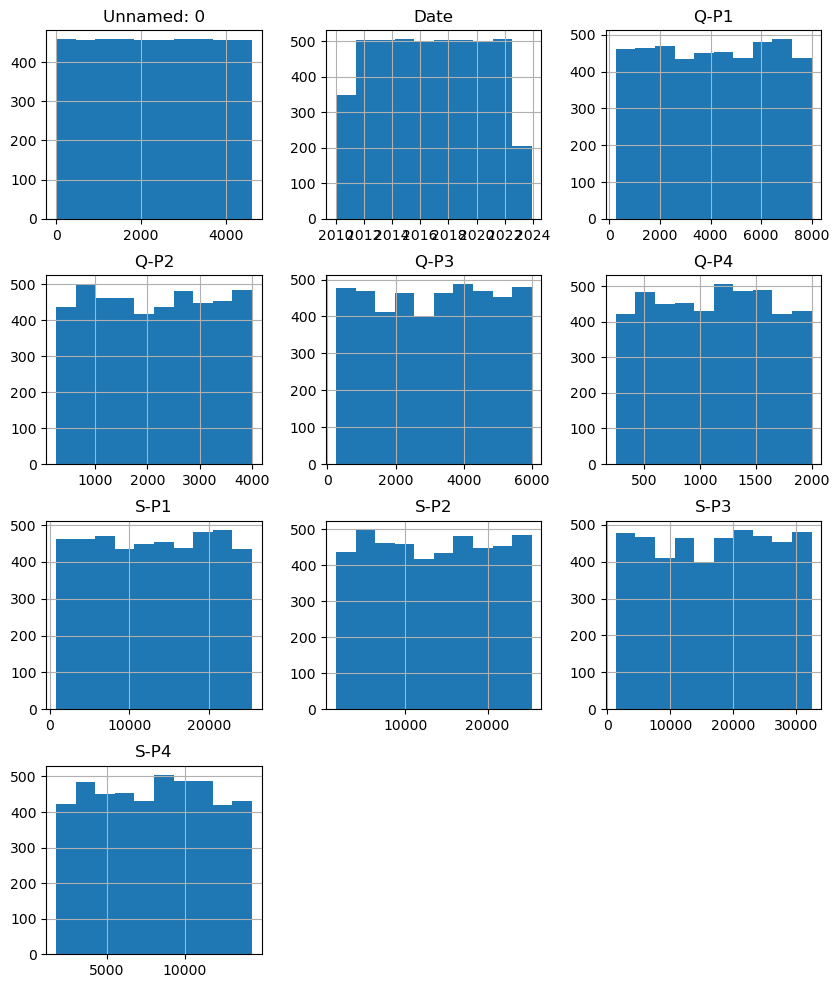

In [13]:
file.hist(figsize=(10, 12))

Here I know the dates are low in 2010 and 2024. I think they may be incomplete.

In [14]:
start_date = file['Date'].min()
print("Start Date:", start_date)

Start Date: 2010-01-07 00:00:00


In [15]:
End_date = file['Date'].max()
print("Start Date:", End_date)

Start Date: 2023-12-01 00:00:00


Our dates are between 2010-07 to 2023-12

#### I select month and year to put them as index, sort them, and use them in Time series form

In [16]:
file['Year'] = file['Date'].dt.year
file['Month'] = file['Date'].dt.month

In [17]:
file['Year_Month'] = file['Date'].dt.strftime('%Y-%b')
file

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Year,Month,Year_Month
0,0,2010-06-13,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,2010,6,2010-Jun
1,1,2010-06-14,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,2010,6,2010-Jun
2,2,2010-06-15,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,2010,6,2010-Jun
3,3,2010-06-16,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,2010,6,2010-Jun
4,4,2010-06-17,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,2010,6,2010-Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,2023-01-30,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,2023,1,2023-Jan
4596,4596,2023-01-31,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,2023,1,2023-Jan
4597,4597,2023-01-02,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,2023,1,2023-Jan
4598,4598,2023-02-02,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,2023,2,2023-Feb


#### Answering this question:
The company has all its retail centers closed on the 31st of December every year. Mr. Hariharan, the CEO, would love to get an estimate on no: of units of each product that could be sold on 31st of Dec, every year, if all their retail centers were kept open.

In [18]:
file[(file['Date'].dt.day == 31) & (file['Date'].dt.month == 31)]

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Year,Month,Year_Month


#### All values of 31th are None, it means that there is no sales on 31th Dec. I predict that later.

#### Selecting appropriate index:

In [19]:
sum_by_year_month = file.groupby('Year_Month').sum()
sum_by_year_month

,Unnamed: 0,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Year,Month
Year_Month,,,,,,,,,,,
2010-Apr,585,28440,19253,22339,5369,90154.80,122064.02,121077.38,38280.97,12060,24
2010-Aug,1860,89376,44816,81106,27357,283321.92,284133.44,439594.52,195055.41,48240,192
2010-Dec,4080,106472,49624,87028,26691,337516.24,314616.16,471691.76,190306.83,48240,288
2010-Feb,573,14829,10792,14925,7072,47007.93,68421.28,80893.50,50423.36,12060,12
2010-Jan,567,19244,10503,17948,7524,61003.48,66589.02,97278.16,53646.12,12060,6
...,...,...,...,...,...,...,...,...,...,...,...
2023-Mar,9167,2640,4753,4348,2108,8368.80,30134.02,23566.16,15030.04,4046,6
2023-May,4570,6026,2435,3590,1207,19102.42,15437.90,19457.80,8605.91,2023,5
2023-Nov,4576,3338,2928,4184,1698,10581.46,18563.52,22677.28,12106.74,2023,11


In [20]:
sum_by_year_month.index = pd.to_datetime(sum_by_year_month.index)
file_sorted = sum_by_year_month.sort_index()

In [21]:
file_sorted.columns

Index(['Unnamed: 0', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3',
       'S-P4', 'Year', 'Month'],
      dtype='object')

In [22]:
file_sorted = file_sorted[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']]

In [23]:
file_sorted.head()

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
Year_Month,,,,,,,,
2010-01-01,19244,10503,17948,7524,61003.48,66589.02,97278.16,53646.12
2010-02-01,14829,10792,14925,7072,47007.93,68421.28,80893.50,50423.36
2010-03-01,29259,18207,14330,6302,92751.03,115432.38,77668.60,44933.26
2010-04-01,28440,19253,22339,5369,90154.80,122064.02,121077.38,38280.97
2010-05-01,28647,15798,6508,8506,90810.99,100159.32,35273.36,60647.78


The dates start from first day of month that it is easy to find out the trends.

## 2.6 Exploratory Data Analysis(EDA)

We observe both trend and multiplicative seasonaliy from the plot shown above

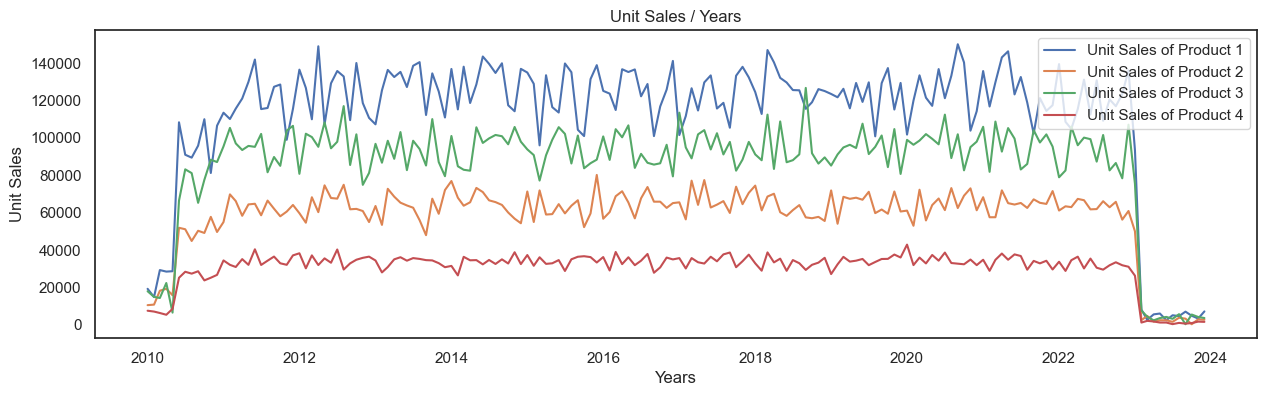

In [24]:
# Set style and figure size
sns.set(style="white", rc={'figure.figsize': (15, 4)})

# Extract data for each product
Qp1 = file_sorted['Q-P1']
Qp2 = file_sorted['Q-P2']
Qp3 = file_sorted['Q-P3']
Qp4 = file_sorted['Q-P4']

# Plot each product
plt.plot(Qp1, label='Unit Sales of Product 1')
plt.plot(Qp2, label='Unit Sales of Product 2')
plt.plot(Qp3, label='Unit Sales of Product 3')
plt.plot(Qp4, label='Unit Sales of Product 4')

# Add labels and legend
plt.title('Unit Sales / Years')
plt.xlabel('Years')
plt.ylabel('Unit Sales')
plt.legend()

# Show the plot
plt.show()

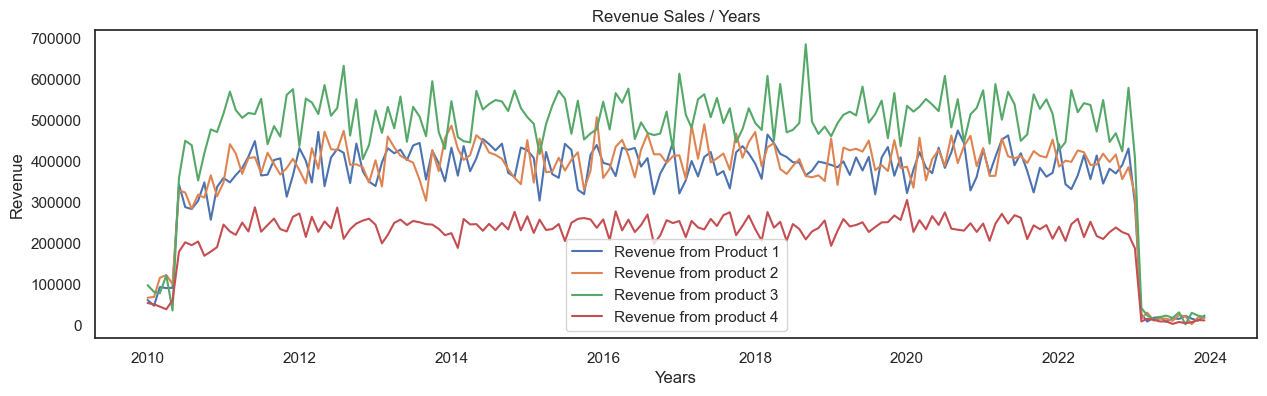

In [25]:
# Set style and figure size
sns.set(style="white", rc={'figure.figsize': (15, 4)})

# Extract data for each product revenue
Sp1 = file_sorted['S-P1']
Sp2 = file_sorted['S-P2']
Sp3 = file_sorted['S-P3']
Sp4 = file_sorted['S-P4']

# Plot each product revenue
plt.plot(Sp1, label='Revenue from Product 1')
plt.plot(Sp2, label='Revenue from product 2')
plt.plot(Sp3, label='Revenue from product 3')
plt.plot(Sp4, label='Revenue from product 4')

# Add labels and legend
plt.title('Revenue Sales / Years')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.legend()

# Show the plot
plt.show()

#### Conclusions:
* Product 1 has the highest unit sales and revenue between 2010 to 2023.(it's the answer of second question)
* Product 4 has the lowest unit sales and revenue between 2010 to 2023.
* product 2 has the higher unit sales than product 3, however their revenues are almost equal.
* their linear trends seasonally is changing.

### 2.6.1 How to check for Stationarity?

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.
- Null Hypothesis  H0
 : Time Series is non-stationary.
- Alternate Hypothesis  Ha
 : Time Series is stationary.
So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected.

In [26]:
from statsmodels.tsa.stattools import adfuller

# List of your time series
time_series_list = [Qp1, Qp2, Qp3, Qp4, Sp1, Sp2, Sp3, Sp4]

# Loop through each time series and apply Dickey-Fuller test
for i, ts in enumerate(time_series_list, start=1):
    result = adfuller(ts)
    print(f"Results for Time Series {i}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    print("\n")

Results for Time Series 1:
ADF Statistic: -1.958826839101297
p-value: 0.3049125999462145
Critical Values:
	1%: -3.470616369591229
	5%: -2.8792214018977655
	10%: -2.57619681359045


Results for Time Series 2:
ADF Statistic: -1.5606842938462362
p-value: 0.5033070343131324
Critical Values:
	1%: -3.470616369591229
	5%: -2.8792214018977655
	10%: -2.57619681359045


Results for Time Series 3:
ADF Statistic: -2.1752801842717453
p-value: 0.21533932520774357
Critical Values:
	1%: -3.470616369591229
	5%: -2.8792214018977655
	10%: -2.57619681359045


Results for Time Series 4:
ADF Statistic: -1.9040438053630002
p-value: 0.33016117493549946
Critical Values:
	1%: -3.4703698981001665
	5%: -2.8791138497902193
	10%: -2.576139407751488


Results for Time Series 5:
ADF Statistic: -1.9588268391012957
p-value: 0.3049125999462151
Critical Values:
	1%: -3.470616369591229
	5%: -2.8792214018977655
	10%: -2.57619681359045


Results for Time Series 6:
ADF Statistic: -1.5606842938462373
p-value: 0.50330703431313

In [27]:
# List of your time series
time_series_list = [Qp1, Qp2, Qp3, Qp4, Sp1, Sp2, Sp3, Sp4]

# Loop through each time series and apply Dickey-Fuller test
for i, ts in enumerate(time_series_list, start=1):
    dftest = adfuller(ts)
    print(f"Results for Time Series {i}:")
    print('DF test statistic is %3.3f' % dftest[0])
    print('DF test p-value is %1.4f' % dftest[1])
    print("\n")

Results for Time Series 1:
DF test statistic is -1.959
DF test p-value is 0.3049


Results for Time Series 2:
DF test statistic is -1.561
DF test p-value is 0.5033


Results for Time Series 3:
DF test statistic is -2.175
DF test p-value is 0.2153


Results for Time Series 4:
DF test statistic is -1.904
DF test p-value is 0.3302


Results for Time Series 5:
DF test statistic is -1.959
DF test p-value is 0.3049


Results for Time Series 6:
DF test statistic is -1.561
DF test p-value is 0.5033


Results for Time Series 7:
DF test statistic is -2.175
DF test p-value is 0.2153


Results for Time Series 8:
DF test statistic is -1.904
DF test p-value is 0.3302




Null hypothesis (H0): The time series is stationary because there is no unit root (if p-value > 0.05).

All series are  p-values>0.5, so all of them are non-stationary. 

### 2.6.2 Categorizing monthly and yearly

In [28]:
file_sorted['Year'] = file_sorted.index.year
file_sorted['Month'] = file_sorted.index.strftime('%b')
file_sorted.head()

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Year,Month
Year_Month,,,,,,,,,,
2010-01-01,19244,10503,17948,7524,61003.48,66589.02,97278.16,53646.12,2010,Jan
2010-02-01,14829,10792,14925,7072,47007.93,68421.28,80893.50,50423.36,2010,Feb
2010-03-01,29259,18207,14330,6302,92751.03,115432.38,77668.60,44933.26,2010,Mar
2010-04-01,28440,19253,22339,5369,90154.80,122064.02,121077.38,38280.97,2010,Apr
2010-05-01,28647,15798,6508,8506,90810.99,100159.32,35273.36,60647.78,2010,May


#### a) Categorizing Monthly

In [29]:
monthly_sales_Q_P1 = pd.pivot_table(file_sorted, values = "Q-P1", columns = "Year", index = "Month")
monthly_sales_Q_P1
monthly_sales_Q_P2 = pd.pivot_table(file_sorted, values = "Q-P2", columns = "Year", index = "Month")
monthly_sales_Q_P2
monthly_sales_Q_P3 = pd.pivot_table(file_sorted, values = "Q-P3", columns = "Year", index = "Month")
monthly_sales_Q_P3
monthly_sales_Q_P4 = pd.pivot_table(file_sorted, values = "Q-P4", columns = "Year", index = "Month")
monthly_sales_Q_P4
monthly_sales_S_P1 = pd.pivot_table(file_sorted, values = "S-P1", columns = "Year", index = "Month")
monthly_sales_S_P1
monthly_sales_S_P2 = pd.pivot_table(file_sorted, values = "S-P2", columns = "Year", index = "Month")
monthly_sales_S_P2
monthly_sales_S_P3 = pd.pivot_table(file_sorted, values = "S-P3", columns = "Year", index = "Month")
monthly_sales_S_P3
monthly_sales_S_P4 = pd.pivot_table(file_sorted, values = "S-P4", columns = "Year", index = "Month")
monthly_sales_S_P4

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Month,,,,,,,,,,,,,,
Apr,38280.97,250377.08,227767.85,249564.26,245892.31,232238.36,231318.59,238398.68,237949.49,240922.70,233978.08,271588.83,259703.12,12648.62
Aug,195055.41,244402.14,210648.72,251147.12,231931.77,249756.77,269998.84,268437.37,234705.34,239411.14,235496.77,209999.89,210235.18,7272.60
Dec,190306.83,264608.56,259810.07,219568.35,231439.80,237514.56,249250.54,267446.30,255432.25,256601.57,227489.78,210862.62,221286.68,11179.84
Feb,50423.36,228602.06,215340.26,199654.26,188381.73,225058.45,207040.94,214769.86,206327.94,230477.25,227618.12,205807.45,205422.43,8520.35
Jan,53646.12,245450.25,272629.81,245136.53,224480.92,265899.09,258255.73,254177.37,234327.45,193415.51,305648.84,247938.62,240452.12,187233.80
Jul,202156.89,228088.70,287046.67,254284.32,247147.19,205222.79,244380.75,242113.41,246755.04,227340.05,275267.91,262227.14,217571.95,2488.37
Jun,179290.98,287795.32,236566.27,244416.40,230391.69,246705.13,227290.14,259325.23,205821.71,250983.13,244523.35,268394.59,252359.22,8591.65
Mar,44933.26,220381.17,264637.08,220181.53,259139.85,257435.78,277570.90,254284.32,275966.65,258947.34,256216.55,247667.68,246227.42,15030.04
May,60647.78,228616.32,253236.21,257599.77,246598.18,234498.57,257400.13,233521.76,252138.19,244452.05,266112.99,248024.18,214826.90,8605.91


In [30]:
monthly_sales_Q_P1 = monthly_sales_Q_P1.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_Q_P1
monthly_sales_Q_P2 = monthly_sales_Q_P2.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_Q_P2
monthly_sales_Q_P3 = monthly_sales_Q_P3.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_Q_P3
monthly_sales_Q_P4 = monthly_sales_Q_P4.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_Q_P4
monthly_sales_S_P1 = monthly_sales_S_P1.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_S_P1
monthly_sales_S_P2 = monthly_sales_S_P2.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_S_P2
monthly_sales_S_P3 = monthly_sales_S_P3.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_S_P3
monthly_sales_S_P4 = monthly_sales_S_P4.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_S_P4

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Month,,,,,,,,,,,,,,
Jan,53646.12,245450.25,272629.81,245136.53,224480.92,265899.09,258255.73,254177.37,234327.45,193415.51,305648.84,247938.62,240452.12,187233.80
Feb,50423.36,228602.06,215340.26,199654.26,188381.73,225058.45,207040.94,214769.86,206327.94,230477.25,227618.12,205807.45,205422.43,8520.35
Mar,44933.26,220381.17,264637.08,220181.53,259139.85,257435.78,277570.90,254284.32,275966.65,258947.34,256216.55,247667.68,246227.42,15030.04
Apr,38280.97,250377.08,227767.85,249564.26,245892.31,232238.36,231318.59,238398.68,237949.49,240922.70,233978.08,271588.83,259703.12,12648.62
May,60647.78,228616.32,253236.21,257599.77,246598.18,234498.57,257400.13,233521.76,252138.19,244452.05,266112.99,248024.18,214826.90,8605.91
Jun,179290.98,287795.32,236566.27,244416.40,230391.69,246705.13,227290.14,259325.23,205821.71,250983.13,244523.35,268394.59,252359.22,8591.65
Jul,202156.89,228088.70,287046.67,254284.32,247147.19,205222.79,244380.75,242113.41,246755.04,227340.05,275267.91,262227.14,217571.95,2488.37
Aug,195055.41,244402.14,210648.72,251147.12,231931.77,249756.77,269998.84,268437.37,234705.34,239411.14,235496.77,209999.89,210235.18,7272.60
Sep,204081.99,260109.53,234177.72,246512.62,249500.09,259389.40,198442.16,275538.85,209294.02,250847.66,232865.80,243589.32,226962.16,4384.95


To represent the distribution of the data, if there is an existence of seasonality in a plot.

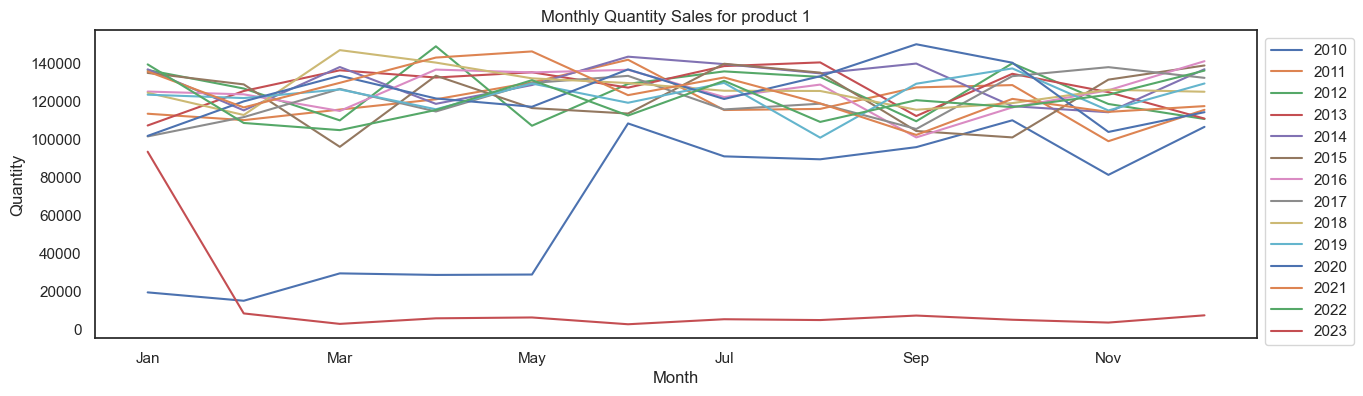

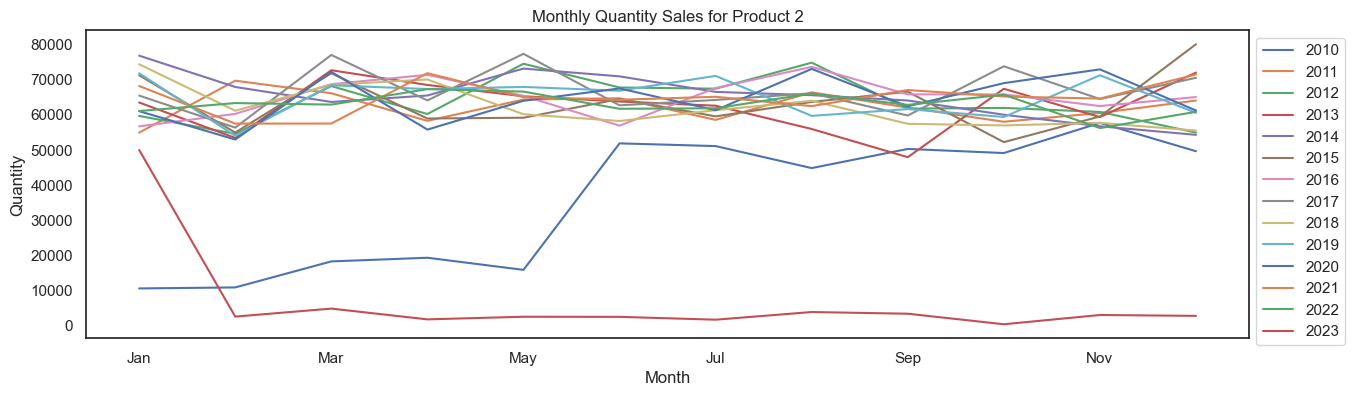

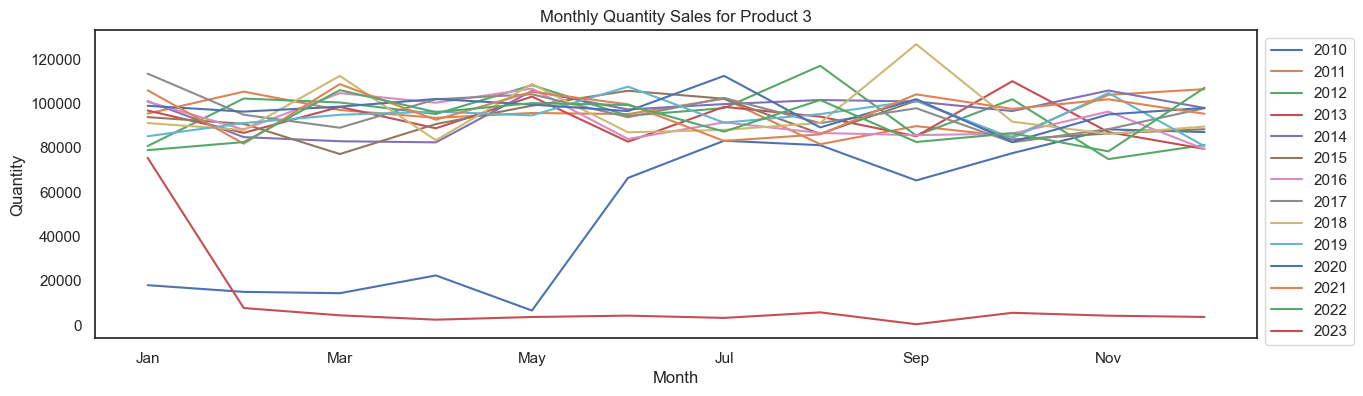

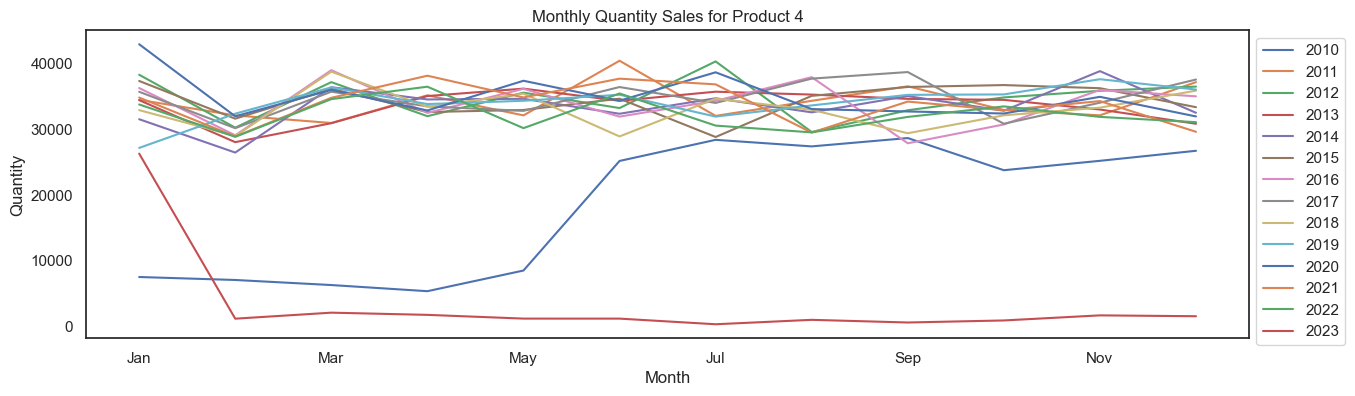

In [31]:
# Set style and figure size
sns.set(style="white", rc={'figure.figsize': (15, 4)})

# Plot monthly_sales_Q_P1
ax1 = monthly_sales_Q_P1.plot()
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_facecolor('white')
ax1.set_title('Monthly Quantity Sales for product 1')
ax1.set_ylabel('Quantity')

# Show plot for monthly_sales_Q_P1
plt.show()

# Plot monthly_sales_Q_P2
ax2 = monthly_sales_Q_P2.plot()
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_facecolor('white')
ax2.set_title('Monthly Quantity Sales for Product 2')
ax2.set_ylabel('Quantity')


# Show plot for monthly_sales_Q_P2
plt.show()

# Plot monthly_sales_Q_P3
ax3 = monthly_sales_Q_P3.plot()
ax3.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax3.set_facecolor('white')
ax3.set_title('Monthly Quantity Sales for Product 3')
ax3.set_ylabel('Quantity')

# Show plot for monthly_sales_Q_P3
plt.show()

# Plot monthly_sales_Q_P4
ax4 = monthly_sales_Q_P4.plot()
ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax4.set_facecolor('white')
ax4.set_title('Monthly Quantity Sales for Product 4')
ax4.set_ylabel('Quantity')

# Show plot for monthly_sales_Q_P4
plt.show()

Paterns in quantity and revenue of the sale are the same. The amount of quantity and revenue are just different.

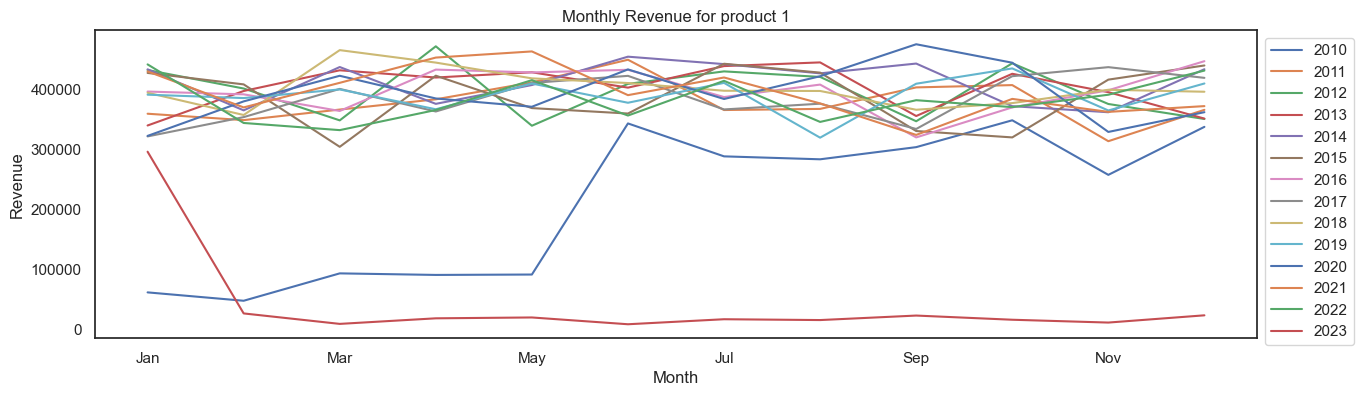

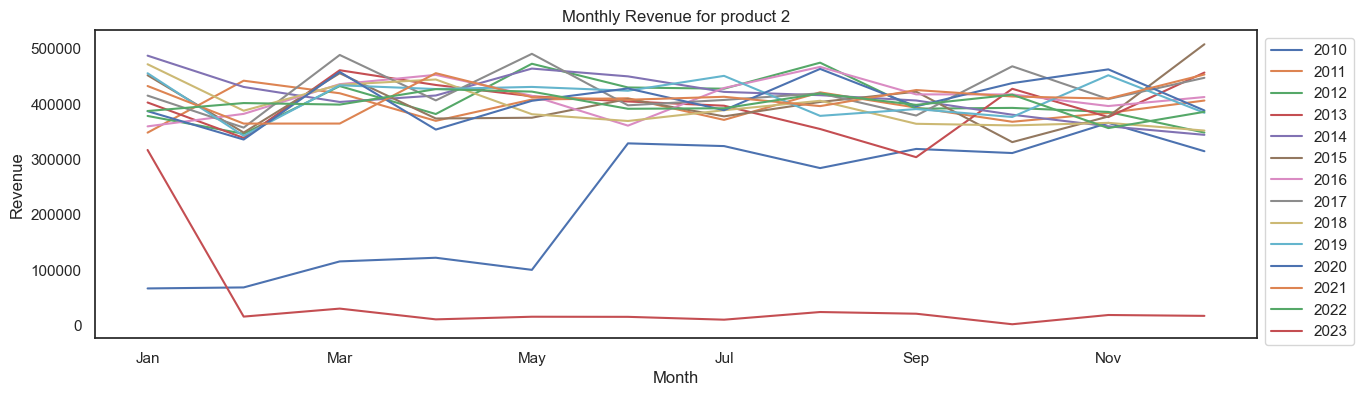

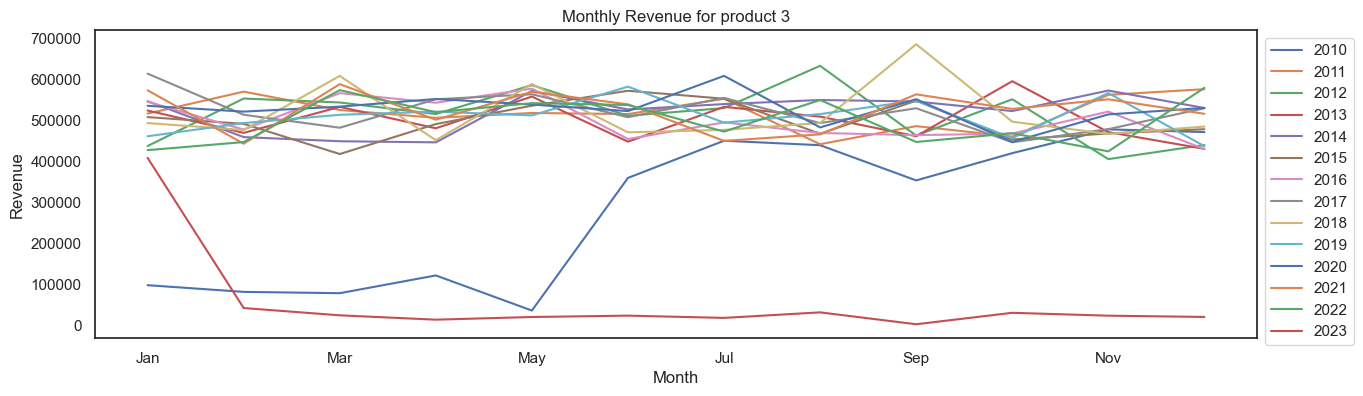

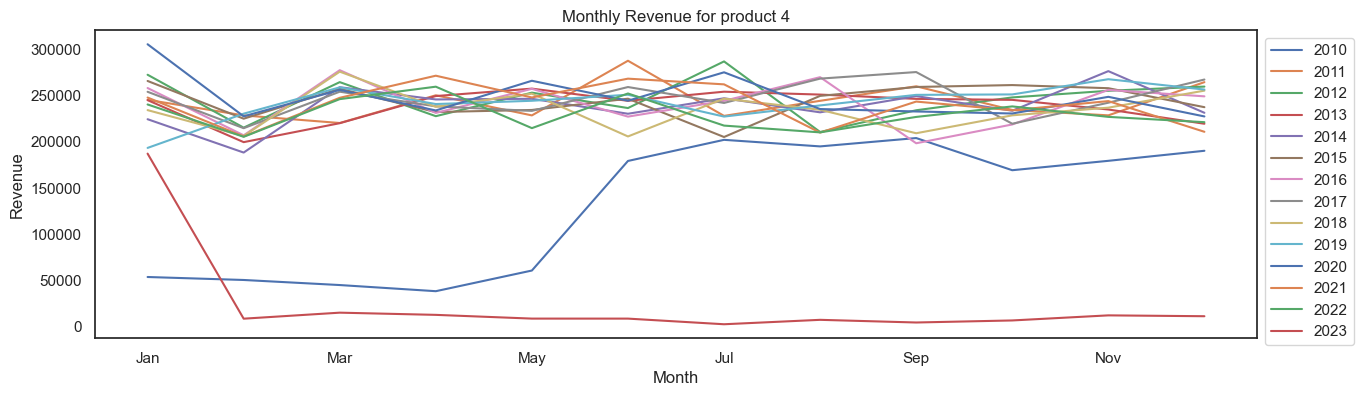

In [32]:
# Set style and figure size
sns.set(style="white", rc={'figure.figsize': (15, 4)})

# Plot monthly_sales_S_P1
ax1 = monthly_sales_S_P1.plot()
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_facecolor('white')
ax1.set_title('Monthly Revenue for product 1')
ax1.set_ylabel('Revenue')

# Show plot for monthly_sales_S_P1
plt.show()

# Plot monthly_sales_S_P2
ax2 = monthly_sales_S_P2.plot()
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_facecolor('white')
ax2.set_title('Monthly Revenue for product 2')
ax2.set_ylabel('Revenue')

# Show plot for monthly_sales_S_P2
plt.show()

# Plot monthly_sales_S_P3
ax3 = monthly_sales_S_P3.plot()
ax3.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax3.set_facecolor('white')
ax3.set_title('Monthly Revenue for product 3')
ax3.set_ylabel('Revenue')

# Show plot for monthly_sales_S_P3
plt.show()

# Plot monthly_sales_S_P4
ax4 = monthly_sales_S_P4.plot()
ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax4.set_facecolor('white')
ax4.set_title('Monthly Revenue for product 4')
ax4.set_ylabel('Revenue')

# Show plot for monthly_sales_S_P4
plt.show()

#### Conclusion:
    * There is no special trend in monthly unit sales, totally.
    * There is an exception in 2020 for all 4 products. This trend is between May to Jun in 2020.
    * The trend of unit sales is increasing during a year in 2020. It starts from May to July.
    * The data isn't enough in 2023. We can predict 2023 and 2024 later.

#### b) Categorizing Yearly

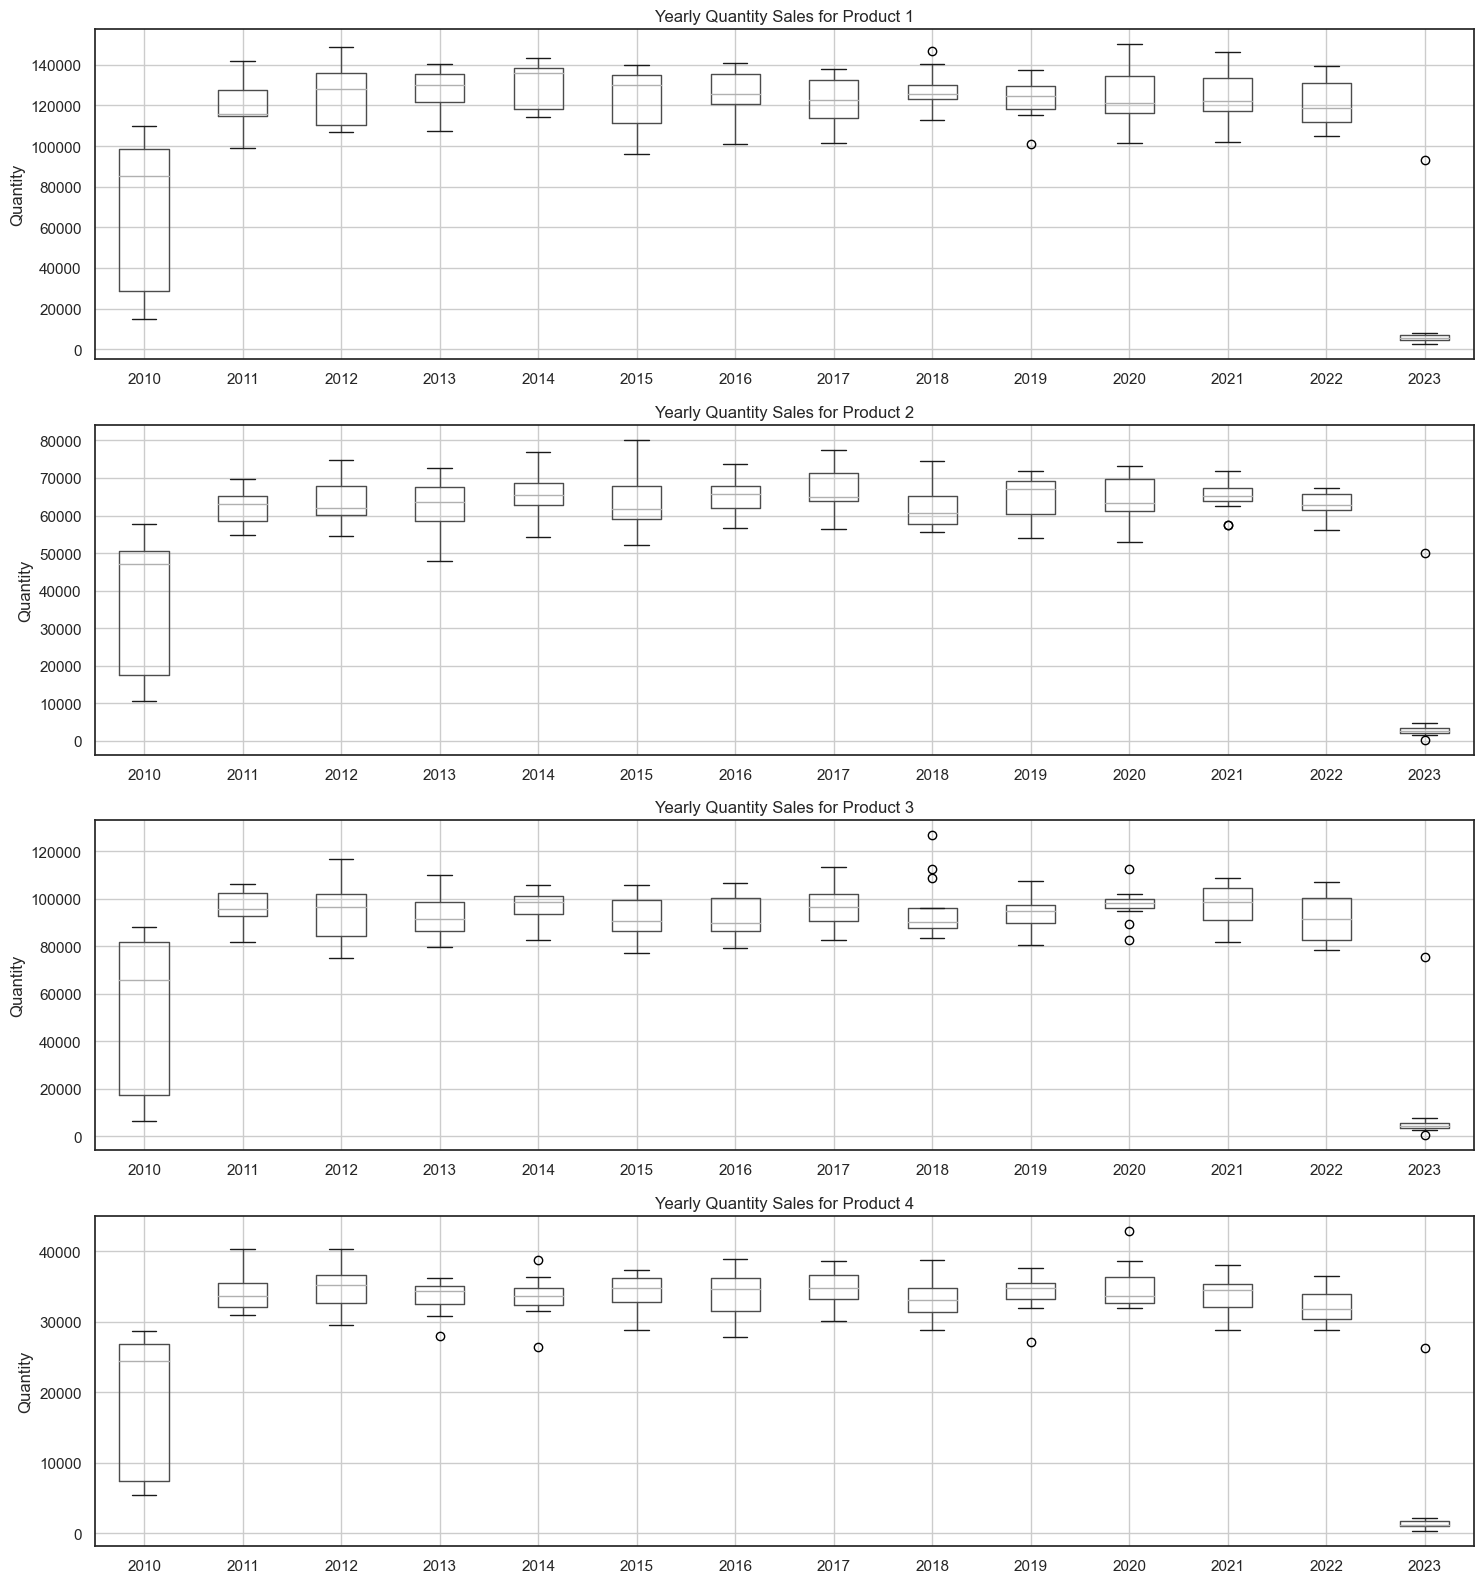

In [33]:
# Set style and figure size
sns.set(style="white", rc={'figure.figsize': (15, 16)})

# Create a figure with multiple subplots
fig, axes = plt.subplots(4, 1)

# Plot boxplots for each DataFrame on separate subplots
for i, df in enumerate([monthly_sales_Q_P1, monthly_sales_Q_P2, monthly_sales_Q_P3, monthly_sales_Q_P4]):
    df.boxplot(ax=axes[i])
    axes[i].set_title(f'Yearly Quantity Sales for Product {i+1}')
    axes[i].set_ylabel(f'Quantity')
    axes[i].set_facecolor('white')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Paterns in quantity and revenue of the sale are the same. The amount of quantity and revenue are just different.

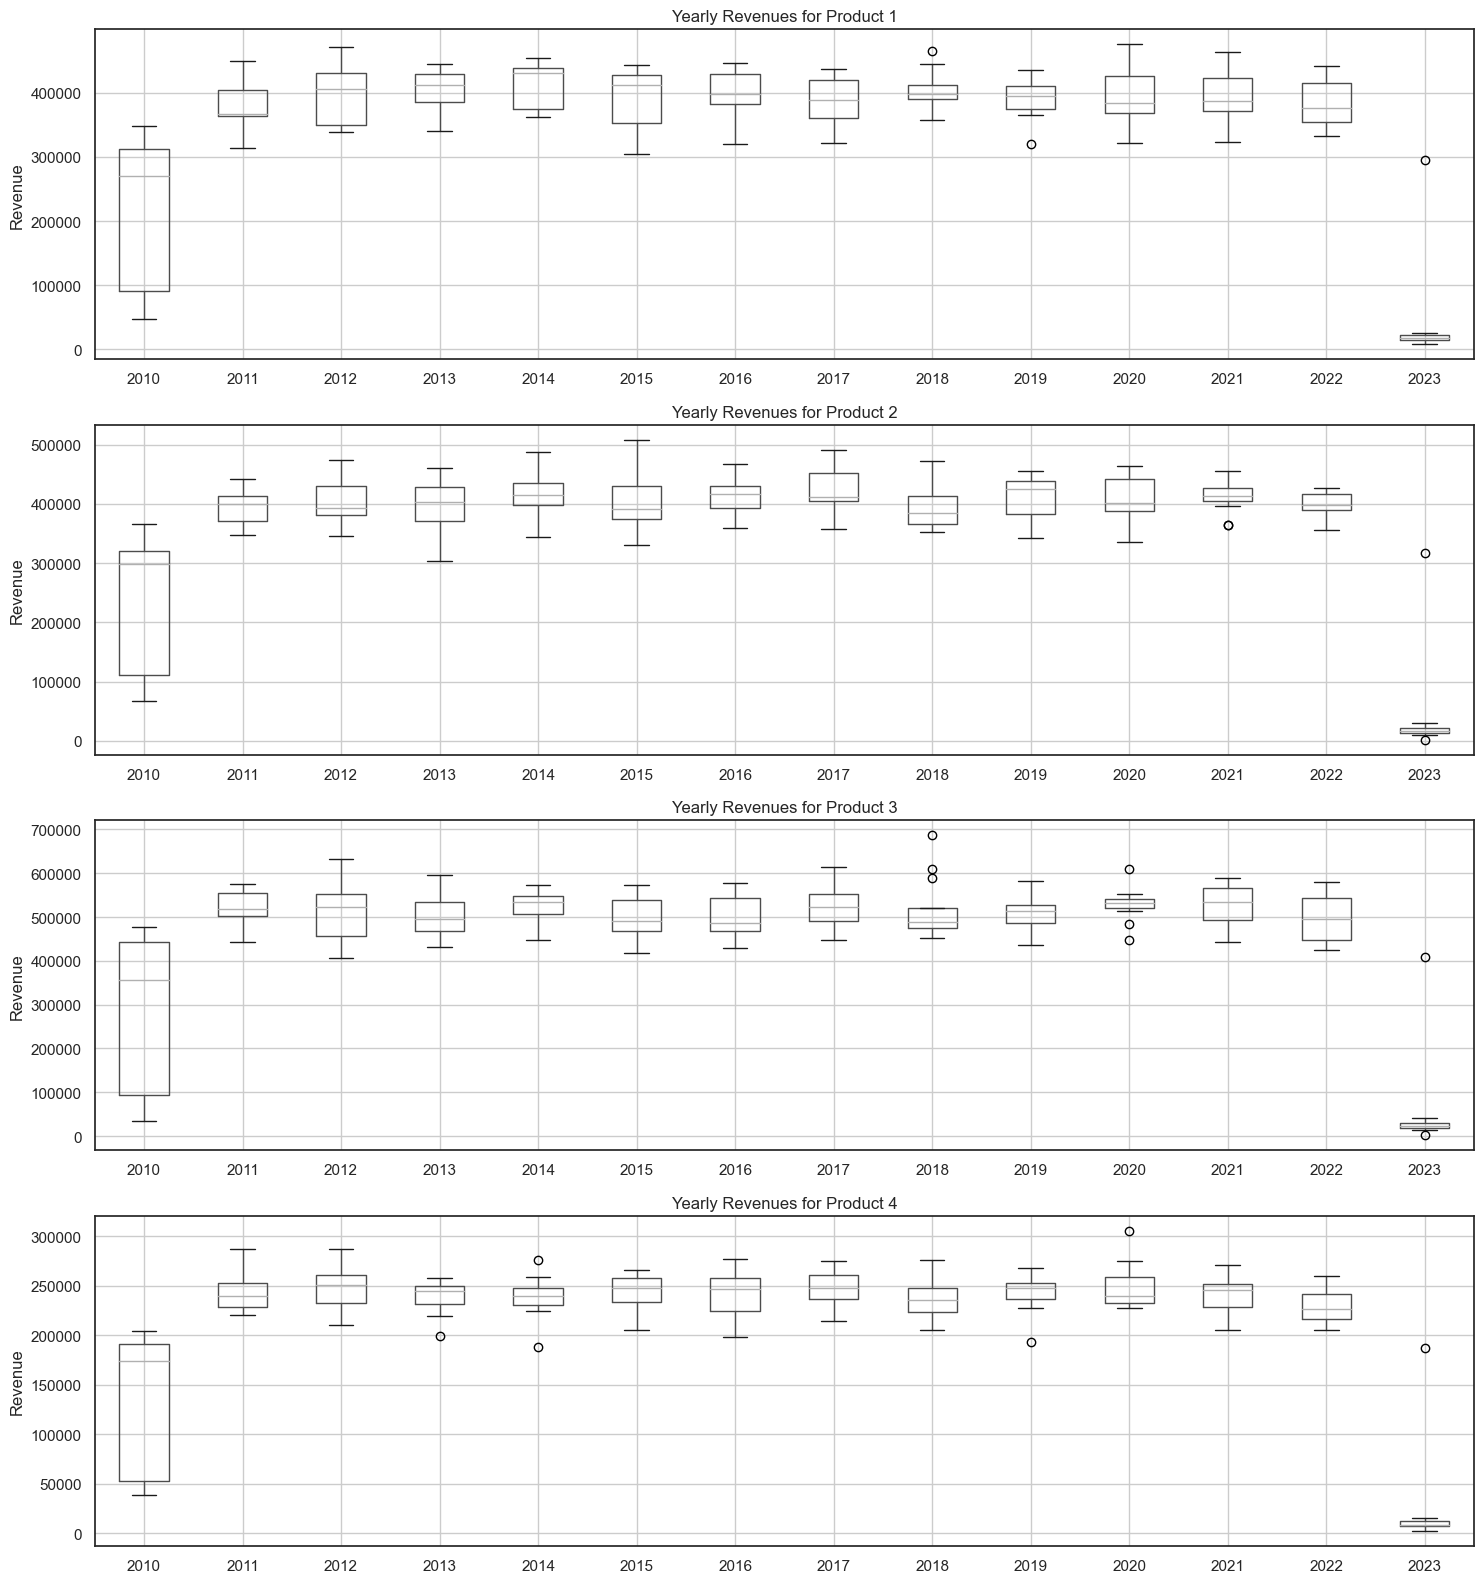

In [34]:
# Set style and figure size
sns.set(style="white", rc={'figure.figsize': (15, 16)})

# Create a figure with multiple subplots
fig, axes = plt.subplots(4, 1)

# Plot boxplots for each DataFrame on separate subplots
for i, df in enumerate([monthly_sales_S_P1, monthly_sales_S_P2, monthly_sales_S_P3, monthly_sales_S_P4]):
    df.boxplot(ax=axes[i])
    axes[i].set_title(f'Yearly Revenues for Product {i+1}')
    axes[i].set_ylabel(f'Revenue')
    axes[i].set_facecolor('white')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### Conclusion:
    * There is no special trend in monthly unit sales, totally.
    * There is an exception in 2010 and 2023 for all 4 products.
    * The data isn't enough in 2023. We can predict 2023 and 2024 later.

## 2.7 Summary:

#### Here is the question that CEO asked before:

**Now, REC Corp needs you to solve the following questions: **
1) Is there any trend in the sales of all four products during certain months?

2) Out of all four products, which product has seen the highest sales in all the given years?

3) The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company.

4) The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.

#### Answers:

1) There is not any special trend in our data except that in 2020 we have some specific trend for quantity and revenue   sales between May to Jun. They increased about 4 times.

2) Product 1 has the highest quantity and revenue sales. Product 4 has the lowest quantity and revenue sales.
    product 2 has greater quantity sales in comparing to product 3, however their revenues sales trend and amount are 
    approximately equal.

3) If CEO decided to drop one product, I would suggest to drop product 4. because product 4 has the lowest quantity and 
    revenue sales.

4) There is no answer in Data Wrangling and EDA. I will answer this question later.

#### Other Conclusions:

•	Product 1 has the highest unit sales and revenue between 2011 to 2022. (it's the answer of second question)

•	Product 4 has the lowest unit sales and revenue between 2011 to 2022.

•	product 2 has the higher unit sales than product 3, however their revenues are almost equal.

•	their linear trends seasonally are changing.
